In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Dataset direction from drive and importing required libraries**


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r'/content/drive/MyDrive/Colab Notebooks/surface defect detection/NEU Metal Surface Defects Data/train'
valid_dir = r'/content/drive/MyDrive/Colab Notebooks/surface defect detection/NEU Metal Surface Defects Data/valid'


**Data Augmentation**

In [ ]:
img_height, img_width = 256, 256
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

**Data Generator from its directory**

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3,InceptionResNetV2,MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

**Model Training steps**

In [ ]:
def create_model(base_model, num_classes=6):
    base_model.trainable = False  # Freeze the base model layers
    x = base_model.output         # Output of the pre-trained model
    x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)              # Adding dropout for regularization
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

**Defining 5 pre-trained models of CNN**

In [ ]:
base_models = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'InceptionResNetV2': InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
}


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<ipython-input-7-d9b6557ab915>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Training each model and save it into drive**

In [ ]:
# Number of classes in the NEU dataset
num_classes = 6

# Dictionary to store training history for each model
history_dict = {}

# Compile, train, store the history and save each model in the drive
for name, base_model in base_models.items():
    print(f"\nTraining {name} model...")

    model = create_model(base_model, num_classes)

    #compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=valid_generator
    )

    # Store the training history
    history_dict[name] = history

    # Save the trained model to Google Drive
    model.save(f'/content/drive/MyDrive/Colab Notebooks/surface defect detection/{name}_model.h5')


Training VGG16 model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 1608s 30s/step - accuracy: 0.1683 - loss: 2.0061 - val_accuracy: 0.2778 - val_loss: 1.7088
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1504s 29s/step - accuracy: 0.2213 - loss: 1.7913 - val_accuracy: 0.5833 - val_loss: 1.5827
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1474s 28s/step - accuracy: 0.3022 - loss: 1.6847 - val_accuracy: 0.7639 - val_loss: 1.4774
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1534s 28s/step - accuracy: 0.3803 - loss: 1.5654 - val_accuracy: 0.8472 - val_loss: 1.3808
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1506s 28s/step - accuracy: 0.4260 - loss: 1.4874 - val_accuracy: 0.8750 - val_loss: 1.2951
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1543s 29s/step - accuracy: 0.5131 - loss: 1.3910 - val_accuracy: 0.8750 - val_loss: 1.2114
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1500s 28s/step - accuracy: 0.5651 - loss: 1.3452 - val_accuracy: 0.8611 - val_loss: 1.1359
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1504s 29s/step - accuracy: 0.6336 - loss: 1.2362 - val_accuracy: 0.875


Training ResNet50 model...
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 483s 9s/step - accuracy: 0.1597 - loss: 2.1614 - val_accuracy: 0.1667 - val_loss: 1.7922
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 483s 9s/step - accuracy: 0.1875 - loss: 1.8734 - val_accuracy: 0.1667 - val_loss: 1.7835
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 494s 9s/step - accuracy: 0.1899 - loss: 1.8177 - val_accuracy: 0.3056 - val_loss: 1.7735
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 481s 9s/step - accuracy: 0.2026 - loss: 1.7838 - val_accuracy: 0.3194 - val_loss: 1.7695
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 472s 9s/step - accuracy: 0.2194 - loss: 1.7795 - val_accuracy: 0.2778 - val_loss: 1.7609
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 474s 9s/step - accuracy: 0.2450 - loss: 1.7637 - val_accuracy: 0.3194 - val_loss: 1.7565
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 473s 9s/step - accuracy: 0.2454 - loss: 1.7619 - val_accuracy: 0.3333 - val_loss: 1.7499
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 473s 9s/step - accuracy: 0.2591 - loss: 1.755


Training InceptionV3 model...
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 346s 6s/step - accuracy: 0.3008 - loss: 1.7473 - val_accuracy: 0.7222 - val_loss: 1.2113
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 376s 6s/step - accuracy: 0.6502 - loss: 1.0861 - val_accuracy: 0.8194 - val_loss: 0.8361
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.7575 - loss: 0.7898 - val_accuracy: 0.8611 - val_loss: 0.6382
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.8518 - loss: 0.5632 - val_accuracy: 0.8611 - val_loss: 0.5271
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 339s 6s/step - accuracy: 0.8680 - loss: 0.4629 - val_accuracy: 0.9306 - val_loss: 0.4136
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 384s 6s/step - accuracy: 0.8961 - loss: 0.3691 - val_accuracy: 0.9306 - val_loss: 0.3319
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.9226 - loss: 0.3285 - val_accuracy: 0.9583 - val_loss: 0.2918
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.9132 - loss: 0.


Training MobileNetV2 model...
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.2548 - loss: 1.9555 - val_accuracy: 0.5139 - val_loss: 1.2275
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.6675 - loss: 0.9880 - val_accuracy: 0.7917 - val_loss: 0.7596
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8177 - loss: 0.6295 - val_accuracy: 0.9028 - val_loss: 0.5268
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8563 - loss: 0.4964 - val_accuracy: 0.9167 - val_loss: 0.3896
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.9136 - loss: 0.3501 - val_accuracy: 0.9722 - val_loss: 0.2723
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9291 - loss: 0.3158 - val_accuracy: 0.9722 - val_loss: 0.2274
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9286 - loss: 0.2763 - val_accuracy: 0.9722 - val_loss: 0.1740
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9371 - loss: 0.


Training InceptionResNetV2 model...
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 747s 14s/step - accuracy: 0.2941 - loss: 1.7297 - val_accuracy: 0.5556 - val_loss: 1.2658
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 722s 13s/step - accuracy: 0.6480 - loss: 1.0493 - val_accuracy: 0.6389 - val_loss: 1.0027
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 733s 13s/step - accuracy: 0.7591 - loss: 0.7711 - val_accuracy: 0.7083 - val_loss: 0.7747
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 741s 13s/step - accuracy: 0.7992 - loss: 0.6537 - val_accuracy: 0.8056 - val_loss: 0.6558
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 707s 13s/step - accuracy: 0.8342 - loss: 0.5522 - val_accuracy: 0.8750 - val_loss: 0.5317
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 730s 13s/step - accuracy: 0.8634 - loss: 0.4762 - val_accuracy: 0.8750 - val_loss: 0.4551
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 695s 13s/step - accuracy: 0.8954 - loss: 0.4026 - val_accuracy: 0.8889 - val_loss: 0.3790
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 710s 14s/step - accuracy: 0.9

**Loss Curves Plots for each model**

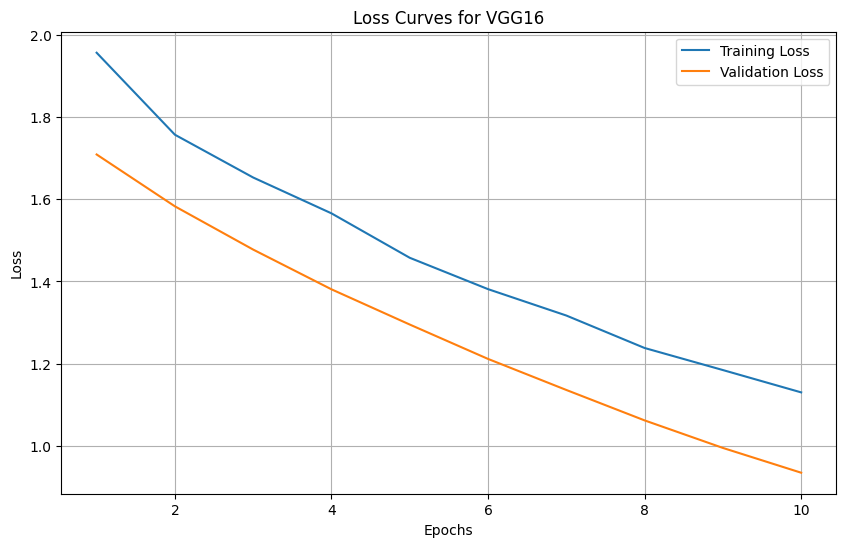

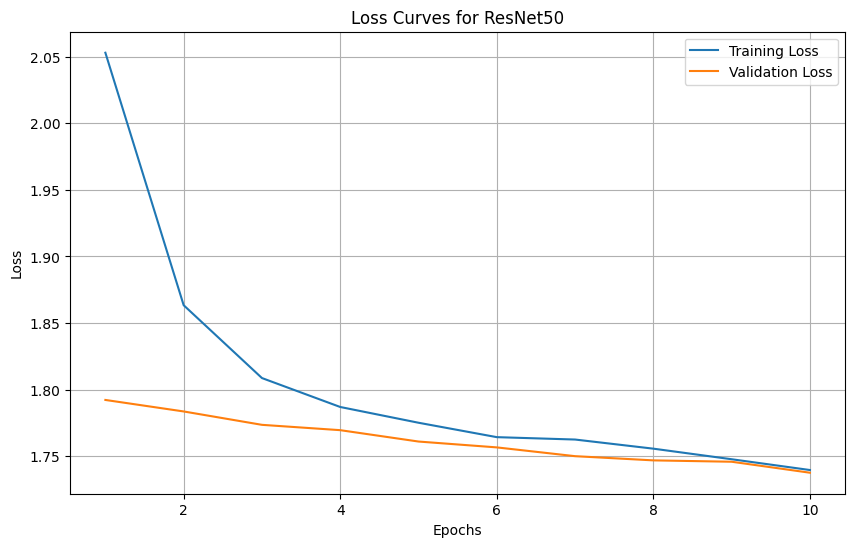

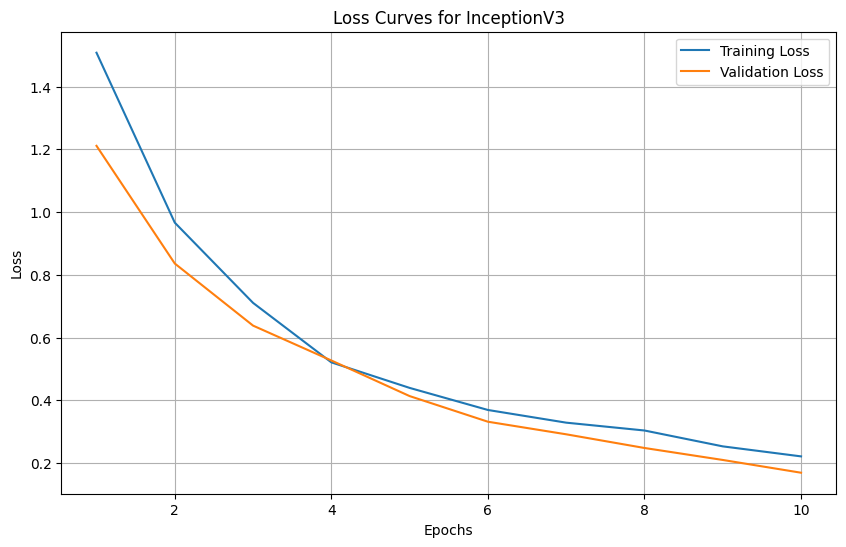

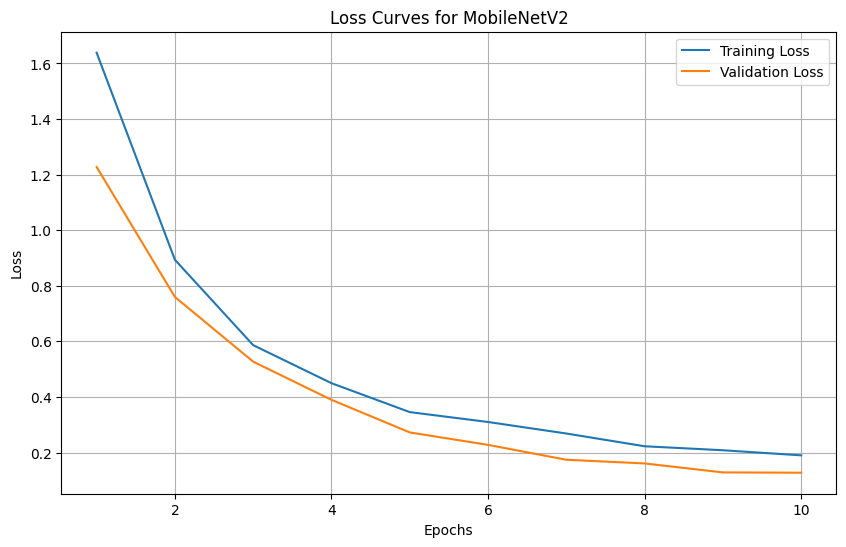

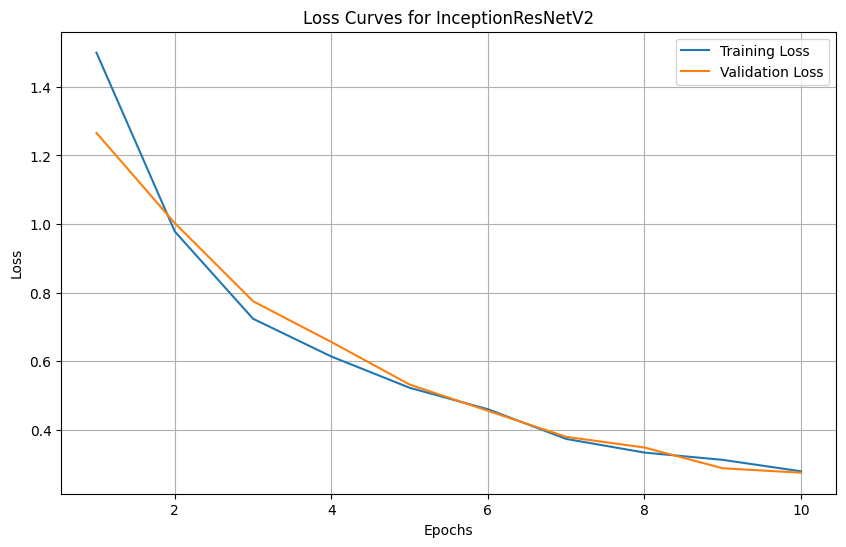

In [ ]:
# plotting loss curve for each model
import matplotlib.pyplot as plt
import seaborn as sns

def plot_loss_curves(history_dict):
    for model_name, history in history_dict.items():
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss')
        sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss')

        plt.title(f'Loss Curves for {model_name}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

plot_loss_curves(history_dict)

**Validation Accuracy of each model**

In [ ]:
# models validation accuracy
for model_name, history in history_dict.items():
    val_accuracy = max(history.history['val_accuracy'])
    print(f"{model_name} Validation Accuracy: {val_accuracy*100:.2f}%")

VGG16 Validation Accuracy: 93.06%
ResNet50 Validation Accuracy: 34.72%
InceptionV3 Validation Accuracy: 100.00%
MobileNetV2 Validation Accuracy: 97.22%
InceptionResNetV2 Validation Accuracy: 91.67%


**Testing best model on test dataset**

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/MyDrive/Colab Notebooks/surface defect detection/InceptionV3_model.h5')


In [ ]:
# Define paths for the test dataset
test_dir = r'/content/drive/MyDrive/Colab Notebooks/surface defect detection/NEU Metal Surface Defects Data/test'

# Data augmentation only for testing (rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 72 images belonging to 6 classes.


**Test Performance**

In [ ]:
# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9705 - loss: 0.1642
Test Loss: 0.1612
Test Accuracy: 0.9722


In [ ]:
# Get predictions
predictions = best_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step


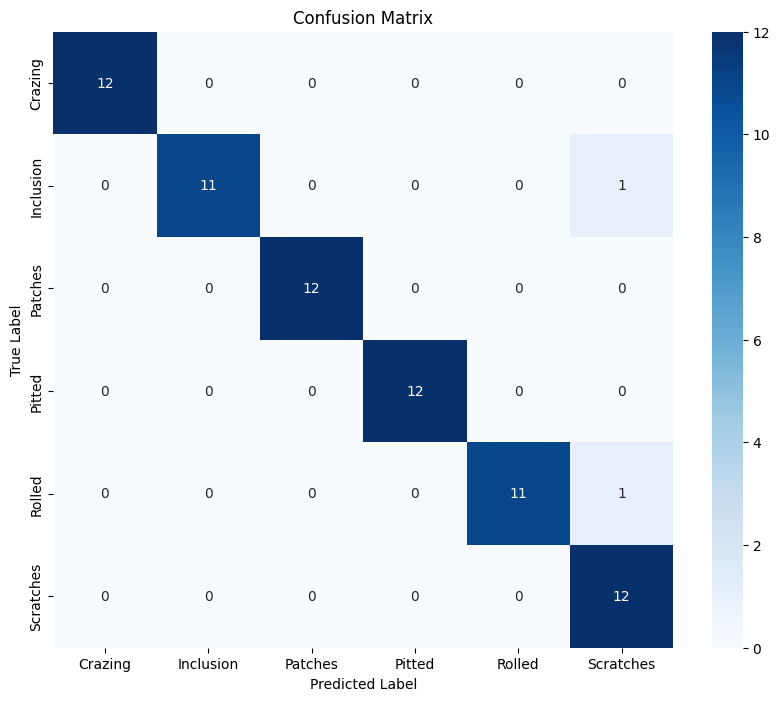

Classification Report:
              precision    recall  f1-score   support

     Crazing       1.00      1.00      1.00        12
   Inclusion       1.00      0.92      0.96        12
     Patches       1.00      1.00      1.00        12
      Pitted       1.00      1.00      1.00        12
      Rolled       1.00      0.92      0.96        12
   Scratches       0.86      1.00      0.92        12

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.98      0.97      0.97        72



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
predicted_classes = np.argmax(best_model.predict(test_generator), axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report:')
print(report)


**Predicting on any random image with confidence score**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/surface defect detection/InceptionV3_model.h5')  # replace with your model path

# Path to the image
img_path = '/content/sample_data/PS_105.bmp'

# Image dimensions
img_height, img_width = 256, 256

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Class labels
class_labels = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']  # adjust based on your model's classes

# Confidence score of the prediction
predicted_class = class_labels[predicted_class_index]
confidence_score = np.max(predictions)

print(f'Predicted Class: {predicted_class}')
print(f'Confidence Score: {confidence_score:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Pitted
Confidence Score: 0.7642
